# Eagar-Tsai model

## My Notes
- Check temperatures either with Comsol code, or surface temperature model or simple analytic solution 
- Heat integration method:Lower the temperature of the molten pool material by an amount due to the phase transformation

For the Rosenthal solution all the power is concentrated on a singular point and thus it is reasonable that the temperature close to that point is extremely high. The analytical solution returns an infinite value at the centerline point (0,0,0). This also has an effect on the shape of the isotherm contours, as they are of constant shape, semi-circular at the transverse YZ plane. 

On the other side, the Eagar-Tsai model distributes the power with a Gaussian heat source. This way the maximum temperature is lower at the centerline of the beam, compared to Rosenthal’s solutions, and the shapes of the isotherms are not constant.

For the case of certain materials, calculations using the experimental processing parameters values for SLM yield high surface temperature values, sometimes higher than the boiling temperature.  These high temperature values at the top surface can be attributed to assumptions made for derivation of the model. Thermal energy losses such as natural heat convection and Marangoni convection from the melt pool, heat radiation to the surroundings, absence of latent heat of fusion and evaporation contribute to a higher surface temperature. In addition, the ET model assumes that the absorbed energy is entirely deposited on the top surface and then conducted to deeper layers. In SLM, the powder bed is porous and the absorbed energy penetrates the top surface, due to porosity and reaches deeper layers, where it interacts with the solid matter. Thus, a three-dimensional energy source would be a more accurate modeling choice compared to the two-dimensional ET model and would yield a lower maximum surface temperature and higher melt depths. However, it would be difficult to determine the heat source distribution formula for SLM, as it would depend on the porosity of the powder bed.




##  Motivation and Background
The purpose of the Eagar-Tsai (ET) model is to provide information about the weld pool shape and size for a travelling Gaussian distributed heat source on a semi-infinite plate. This heat transfer model offers a physically accurate, quantitative relationship between the process, material parameters and the resulting temperature field, thus the weld size and shape. The temperature field prediction allows for a better understanding of the process physical mechanisms and  can be utilized for process control, optimization, design of experiments, microstructure and residual stresses prediction.

In their paper, Eagar and Tsai compare predicted weld pool shapes with experimental weld pool shape measurements for laser welding. 

The calculated temperature field can lead to  



## Rosenthal solution
A simpler solution, derived by Rosenthal, predicts the temperature field produced by a steady state point heat source moving on the surface of a semi-infinite plate:

\begin{align*}
\large
T - T_{o} = \frac{q}{2 \pi k R} \exp{ \bigg({-\frac{v ( w + R )}{2a}} \bigg)}
\end{align*}

$T$: Temperature  
$T_{0}$ : Initial temperature  
$q$ : Power  
$k$ : Material thermal conductivity  
$R$ : Distance to the center of the arc  
$v$ : Travel speed  
$w$ : Distance in travelling direction in a moving coordinate of speed $v$  
$a$ : Material thermal diffussivity  

### In dimensionless form: 

\begin{align*}
\large
\theta = n \frac{e^{-(\xi + R^{*})}}{R^{*}}
\end{align*}

\begin{align*}
\large
\theta = \frac{T-T_{o}}{T_{c}-T_{o}}, \
n = \frac{qv}{4 \pi a^2 \rho c (T_{c}-T_{o})}, \
\xi = \frac{vw}{2a}, R^{*} = (\xi^{2} + \psi^{2} + \zeta^{2})^{1/2}
\end{align*}

$R^{*}$: Dimensionless distance from the center of the arc

Rosenthal's model fails to provide weld pool shape information, as it predicts all transverse isotherms to have semicircular shapes. In addition, it fails to predict the temperature as $R \rightarrow 0$.  
For the model derivation, the following assumptions were made:  
1) Absence of convective and radiative heat flow in weld pool  
2) No latent heat of phase change  
3) Constant average thermal properties  
4) Quasi-steady state semi-infinite medium 

## Eagar-Tsai solution
With Rosenthal's solution as a basis but using a travelling distributed heat source, Eagar and Tsai derived a solution that can predict the weld pool shape and size. Assumming a Gaussian distributed heat source function of the form 

\begin{align*}
\large
Q (x,y) = \frac{q}{2\pi\sigma^{2}}\exp{ \bigg(-\frac{x^2 + y^2}{2\sigma^2}\bigg)}
\end{align*}

where, $\sigma$ is the half-width of the arc.

Eventually, the solution for a Gaussian distributed heat source moving on a semi-infinite plate with no change in phase :

\begin{align*}
\large
T - T_{o} =  \int_0^t dt'' \frac{q}{\pi \rho c (4 \pi a )^{1/2}}\frac{t'' ^{-1/2}}{2at'' + \sigma^{2}} exp{ \bigg({- \frac{ w^{2} + y^{2} + 2 wvt'' + v^2 t''^{2} } {4at'' + 2\sigma^{2}} - \frac{z^{2}}{4at''}}\bigg)}
\end{align*}

$y$: Distance in the width dimension   
$z$: Distance in the depth dimension

### In dimensionless form:  

\begin{align*}
\large
\theta = \frac{n}{ \sqrt {2 \pi}} \int_0^\frac{v^{2} t }{2 a} d \tau \frac{\tau ^{-1/2}}{\tau + u^{2}} \exp { \bigg({- \frac{ \xi^{2} + \psi^{2} + 2 \xi \tau + \tau^{2} } {2\tau + 2u^{2}} - \frac{\zeta^{2}}{2\tau}}\bigg)} 
\end{align*}

\begin{align*}
\large
\xi = \frac{vw}{2a}, \
\psi = \frac{vy}{2a}, \
\zeta = \frac{vz}{2a}, \
\tau = \frac{v^2t''}{2a},\ 
\end{align*}

\begin{align*}
\large
\theta = \frac{T-T_{o}}{T_{c}-T_{o}}, \
u = \frac{ v \sigma  }{2a}, \
n = \frac{qv}{4 \pi a^2 \rho c (T_{c}-T_{o})} \\ 
\end{align*}

$T_{c}$ : Critical temperature ( e.g. material melting temperature)

The distribution ($u$) and operating parameter ($n$) are the two primary parameters of the solution. For $ u \rightarrow 0$ (zero beam width) the solution reduces to Rosenthal's.


# ET model functions

In [1]:
import numpy
from matplotlib import pyplot, cm
%matplotlib inline
from scipy.integrate import quad,quadrature,fixed_quad

def integrand(tau,xi,psi,zi,u):
    '''
    Function that returns the integrand of dimensionless temperature distribution to be numerically integrated
    > tau: Integration variable
    > xi, psi, zi: Dimensionless height, width, depth as in Eagar-Tsai paper
    > u: Distribution parameter, ( travel speed * distribution parameter- radius ) / ( 2 * thermal diffusivity)
    '''
    return ((tau**(-0.5))/(tau+(u**2)))*numpy.exp(-((((xi+tau)**2)+(psi**2))/((2*tau)+(2*(u**2))))-((zi**2)/(2*tau)))

def thetan_width(xi,psi,zi,u,taulim):
    ''' 
    Function that returns the dimensionless temperature - operating parameter ratio along the geometry's 
    dimensionless width by performing quadrature on the E-T model's integral.
    Also, it returns the absolute error of the quadrature.
    
    Inputs
        > xi : Dimensionless length 
        > psi : Dimensionless width (array)
        > zi : Dimensionless depth  
        > u: Distribution parameter, ( travel speed * distribution parameter- radius ) / ( 2 * thermal diffusivity)
        > taulim : Dimensionless time
    
    Outputs
        > thetan : Array with values of dimensionless temperature - operating parameter ratio along dimensionless width
        > error : Array for absolute error of quadrature
    '''
    integral_eval = numpy.zeros ( len ( psi ) ) # Array for numerical integration evaluation
    error = numpy.zeros ( len ( psi ) ) # Array for numerical integration absolute error values
    for i, psivalue in enumerate ( psi ) : #For each value of dimensionless width,evaluate integral and store value
        integral_eval[i],error[i] = quad(integrand,0,taulim,args = ( xi, psivalue,zi,u), epsabs = 1e-10, epsrel=1e-10)
        #integral_eval[i],error[i]=fixed_quad(integrand,0,taulim,args=(xi,psivalue,zi,u),n=8)
    thetan = integral_eval / numpy.sqrt (2*numpy.pi) #Values of non-dimensional temperature/distribution parameter
    return thetan, error

def thetan_depth ( xi, psi, zi, u, taulim ):
    '''
    Function that returns the dimensionless temperature - operating parameter ratio along the geometry's 
    dimensionless depth by performing quadrature on the E-T model's integral. 
    Also, it returns the absolute error of the quadrature.
    
    Inputs
        > xi : Dimensionless length 
        > psi : Dimensionless width 
        > zi : Dimensionless depth  (array)
        > u : Distribution parameter, ( travel speed * distribution parameter- radius ) / ( 2 * thermal diffusivity)
        > taulim : Dimensionless time
        
    Outputs
        > thetan : Array with ratio of dimensionless temperature - operating parameter ratio values along depth
        > error : Array for absolute error of quadrature 
    '''
    integral_eval = numpy.zeros ( len ( zi ) ) # Array for numerical integration evaluation
    error = numpy.zeros ( len ( zi ) )  # Array for numerical integration absolute error values
    for i, zivalue in enumerate (zi): #For each value of dimensionless depth,evaluate integral and store value 
        integral_eval[i], error[i] = quad ( integrand, 0, taulim, args = (xi,psi,zivalue,u), epsabs=1e-10, epsrel=1e-10)
        #integral_eval[i],error[i]=fixed_quad(integrand,0,taulim,args=(xi,psi,zivalue,u),n=8) 
    thetan = integral_eval / numpy.sqrt (2 * numpy.pi ) #Values of non-dimensional temperature/distribution parameter
    return thetan, error

# SLM process simulations with the Eagar-Tsai model

The E-T model has been used for studies on the SLM process, since it simulates a travelling heat source on a plate, similar to the laser heat source that scans the surface of the powder material during the SLM process. The model can provide the temperature field during processing without the need for long-lasting simulations, which is usually the case for FEA computations, especially in time-dependent, three dimension simulations. 

Efficient design of experiments for processing parameter selection can be achieved by the large parameter space that can be studied with a simplified model, as Eagar-Tsai. 

The absorptivity of the material is taken into account to compute the net amount of power that heats the material. 

Both bulk and effective powder thermophysical material properties can be selected for computations.

In [2]:
def Cp (T) :
    '''
    > T : Temperature in degrees Celsius
    Specific heat capacity for Bi2Te3 below 500 C calculated in cal/deg*C
    and converted and returned in J/kgK
    Ref: Bolling, G. F. "Erratum: Addendum to Some Thermal Data for Bi2Te3." 
    The Journal of Chemical Physics 36.4 (1962): 1085-1086.
    '''
    Cp = (3 * (10**-2) ) + (2 * (10 ** -5) ) * T # Result in cal/deg*g
    Cp = Cp * 4186.8 #Convert to J/kgK
    return Cp

def ME_powder ( prop_solid, prop_fluid ,phi ) :
    '''
    Maxwell-Eucken model - Calculates effective powder bed properties as a function of porosity and respective properties
    Results questionable close to 50% porosity
    > prop_solid: Solid phase property
    > prop_fluid : Fluid phase property
    > phi : Porosity 
    Xue, Samuel S., and Joel W. Barlow. "Models for the Prediction of the Thermal."
    1991 International Solid Freeform Fabrication Symposium. 1991.
    '''
    if phi <= 0.5:
        apar = (3 * prop_solid) / ( (2 * prop_solid) + prop_fluid)
        num = prop_solid * ( 1 - ( (1 - ((apar * prop_fluid) / prop_solid ) ) * phi) )
        den = 1 + ( ( apar - 1 ) * phi)
        ME_powder = num / den
        
    elif phi > 0.5 : 
        apar = (3 * prop_fluid ) / ( (2 * prop_fluid) + prop_solid )
        num = prop_fluid * (1 - (1 - (apar * prop_solid / prop_fluid)) * (1 - phi) )
        den = 1 + ( (apar - 1) * (1 - phi) )
        ME_powder = num / den
    
    return ME_powder

def Sih_Barlow ( prop_solid, prop_fluid, phi, k_radiation, contact):
    '''
    For no contact between particles, contact = 0 
    for complete particle contact, contact = 1
    Sih, Samuel Sumin, and Joel W. Barlow. "The prediction of the emissivity and thermal conductivity of powder beds." 
    Particulate Science and Technology 22.4 (2004): 427-440.
    '''
    if phi < ( 3 * 10 ** - 4):
        k_contact =  18 * phi * prop_solid
    else: 
        k_contact = prop_solid
        
    B =  1.25 * ( ( ( 1 - phi ) / phi )**( 10 / 9 ) ) # Deformation parameter of the particle
    core = ( ( 1 - numpy.sqrt ( 1 - phi ) ) * ( 1 + ( phi * k_radiation / prop_fluid ) ) ) + ( ( numpy.sqrt ( 1 - phi) ) * ( ( 1 - contact ) *( (2/(1 - (B*prop_fluid/prop_solid)))*((B/((1 - (B*prop_fluid/prop_solid))**2))*(1-(prop_fluid/prop_solid))*numpy.log(prop_solid/(B*prop_fluid))- ((B+1)/2)-((B-1)/(1 - (B*prop_fluid/prop_solid))))+(k_radiation/prop_fluid))+ ( contact * ( k_contact / prop_fluid ) )) )    
    calc_eff = core * prop_fluid
    return calc_eff

def k_rad ( emissivity, Temperature, partdiam ): 
    '''
    Calculates the contribution of thermal radiation to the effective conductivity of the powder bed as a function of 
    effective emissivity of powder bed, its temperature and consisting particle diameter
    Sih, Samuel Sumin, and Joel W. Barlow. "The prediction of the emissivity and thermal conductivity of powder beds." 
    Particulate Science and Technology 22.4 (2004): 427-440.
    '''
    sigma = 5.67 * (10**-8) # Stefan-Boltzmann constant
    cond_radiation =  ( 4 * emissivity *sigma* ( Temperature ** 3 ) * partdiam ) / ( 1 - ( 0.132 *emissivity ) )
    return cond_radiation

def effemis (solid_emissivity, porosity): 
    '''
    Model for the prediction of the powder bed effective emissivity as function of solid bulk emissivity & 
    powder bed porosity
    Sih, Samuel Sumin, and Joel W. Barlow. "The prediction of the emissivity and thermal conductivity of powder beds." 
    Particulate Science and Technology 22.4 (2004): 427-440.
    '''
    Ahole = ( 0.908 * ( porosity ** 2 ) ) / ( ( 1.908 * ( porosity ** 2 ) ) - ( 2 * porosity ) + 1 ) # Cavity surface fraction
    ehole = ( solid_emissivity * ( 2 + 3.082 * ( ( ( 1 - porosity) / porosity ) ** 2 ) ) ) / ( ( solid_emissivity * ( 1 + 3.082 * ( ( ( 1 - porosity) / porosity ) ** 2 ) ) ) + 1 )# Emissivity of cavity
    effective_emissivity = ( Ahole * ehole ) + ( solid_emissivity * ( 1 - Ahole) )
    return effective_emissivity

def rho_powder ( bulk_density, porosity ):
    '''
    Calculates the effective density of the powder bed as a function of porosity and bulk phase density
    '''
    rho_bed = bulk_density * ( 1 - porosity ) 
    return rho_bed

def Tcont(w,y,z,t,q,A,v,r,a,rho,C,To):
    '''
    Function that calculates the temperature field to be plotted in contour plot
    '''
    if isinstance(w,(float,int)):
        err=numpy.zeros(shape=(len(z),len(y)))
        res= numpy.zeros(shape=(len(z),len(y)))
        i=0
        for zvalue in z:
            j=0
            for yvalue in y:
                res[i,j],err[i,j]=quad(integrand,0,t,args=(w,yvalue,zvalue,v,r,a,A,q,rho,C))
                j=j+1
            i=i+1
        Tcont=res+To
        plane = 'YZ'
    elif isinstance (y,(float,int)):
        res= numpy.zeros(shape=(len(z),len(w)))
        err=numpy.zeros(shape=(len(z),len(w)))
        
        i = 0 
        for zvalue in z:
            j = 0
            for wvalue in w:
                res[i,j],err[i,j]=quad(integrand,0,t,args=(wvalue,y,zvalue,v,r,a,A,q,rho,C))
                j = j+1
            i=i+1
        Tcont =res+To
        plane = 'XZ'
    else:
        res= numpy.zeros(shape=(len(y),len(w)))
        err=numpy.zeros(shape=(len(y),len(w)))
        
        i = 0 
        for yvalue in y:
            j = 0
            for wvalue in w:
                res[i,j],err[i,j]=quad(integrand,0,t,args=(wvalue,yvalue,z,v,r,a,A,q,rho,C)) 
                j = j+1
            i=i+1
        Tcont =res+To
        plane = 'XY'
    return Tcont,err,plane

def XMelt (Tdistribution, Dimension, Tmelting):
    '''
    Calculates the melt characteristic dimension (where T = melting temperature) for 
    each power value and returns the melt length in μm, as an array from low to high power.
    
    > Tdistribution = Array with temperature distribution along desired dimension
    > Dimension = Array with values for the desired dimension
    > Tmelting = Melting temperature in K
    '''
    rowcount = numpy.size (Tdistribution,0)
    columncount = numpy.size (Tdistribution,1)

    for row in numpy.arange (rowcount):
        for col in numpy.arange (columncount):
            if (Tdistribution [row,col] - Tmelting ) <= 0.1:
                meltdimension = Dimension [:,col ]
                break
    meltdimension = meltdimension * ( 10**6 )   # Convert to micrometers    
    return meltdimension



## Thermophysical Properties

In [3]:
# Absorptivity value for Bi2Te3 powder bed
Absor = 0.4 

# Powder bed porosity 
phi = 0.4 # ME model results questionable close to 50%

# Largest particle diameter in meters
partdiam = 53e-06 

# Initial (ambient) temperature in K
Tambient = 300 

# Bi2Te3 melting temperature(from Alfa-Aesar material specs sheet-573 C) in K
Tmelt = 846 

# Thermal conductivity of intrinsic Bi2Te3 at 300K (W/mK)
'''Goldsmid, H. J. "Heat conduction in bismuth telluride." 
Proceedings of the Physical Society 72.1 (1958): 17.'''
k_solid = 2.3

# Thermal conductivity of argon gas at 300K - 1 bar (W/mK)
'''Jaques, Al. Thermophysical properties of argon. No. FERMILAB-D0-EN-142. 
Fermi National Accelerator Laboratory, 1988.'''
k_gas = 0.01791

# Specific heat capacity at 27 degrees or 300K given in J/kgK
'''Bolling, G. F. "Erratum: Addendum to Some Thermal Data for Bi2Te3." 
The Journal of Chemical Physics 36.4 (1962): 1085-1086.'''
C_solid = Cp ( 27 )

# Specific heat capacity of argon at 300K  given in J/kgK
''' Jaques, Al. Thermophysical properties of argon. No. FERMILAB-D0-EN-142. 
Fermi National Accelerator Laboratory, 1988. '''
C_gas = 521 

# Latent heat of fusion of Bi2Te3 in J/kg
'''Bolling, G. F. "Some thermal data for Bi2Te3." The Journal of Chemical Physics 33.1 (1960): 305-306.'''
L_f = 151.53e3

# Bulk density of Bi2Te3 in kg/m^3 
'''From Alfa-Aesar material specs sheet'''
rho = 7642 

# Density of argon gas at 300 K and 1 atm in kg/m^3
'''Jaques, Al. Thermophysical properties of argon. No. FERMILAB-D0-EN-142. 
Fermi National Accelerator Laboratory, 1988.'''
rho_gas = 1.61 

# Bulk emissivity of Bi2Te3 
solid_emissivity = 0.66 

# Effective powder bed emissivity
epsilon = effemis ( solid_emissivity, phi ) 

# Radiation contribution to powder bed thermal conductivity
k_radiation = k_rad ( epsilon, Tambient, partdiam ) 

# Effective thermal conductivity of powder bed in W/mK
kpow = ME_powder ( k_solid, k_gas ,phi )
# kpow = Sih_Barlow ( k_solid, k_gas, phi, k_radiation, 1 )

# Effective density of powder bed in kg/m^3
rho_bed = rho_powder ( rho , phi )

# Effective powder bed thermal diffusivity in m^2/s 
apow = kpow / ( rho_bed * C_solid )

## Experimental Processing Parameters

In [45]:
power = 20  # Laser power values from experiments: 11,14,15,16,20,25 W 

speed = 0.5 # m/s Scan speed values from experiments 
#v = 0.35 # mm/s

radius = 25e-06
t = 1e-03

points = 200
w_YX = numpy.linspace ( -600e-06, 150e-06, points )
y_YX = numpy.linspace ( -200e-06, 200e-06, points )
z_YX = 0

w_XZ = numpy.linspace ( -600e-06, 150e-06, points )
y_XZ = 0
z_XZ = numpy.linspace ( 0, 200e-06, points  )

xi_YX = ( speed * w_YX ) / ( 2 * apow )
psi_YX = ( speed * y_YX ) / ( 2 * apow )
zi_YX = ( speed * z_YX ) / ( 2 * apow )

xi_XZ = ( speed * w_XZ ) / ( 2 * apow )
psi_XZ = ( speed * y_XZ ) / ( 2 * apow )
zi_XZ = ( speed * z_XZ ) / ( 2 * apow )

u_par = ( speed * radius ) / ( 2 * apow ) # Distribution parameter
n_par = (  power * speed ) / ( 4 * numpy.pi * rho_bed * C_solid * ( apow ** 2 ) ) # Operating parameter
tau = ( ( speed ** 2 ) * t ) / ( 2 * apow )
print ( tau, u_par, n_par )

63.1136053245272 3.1556802662263603 346024.26702858496


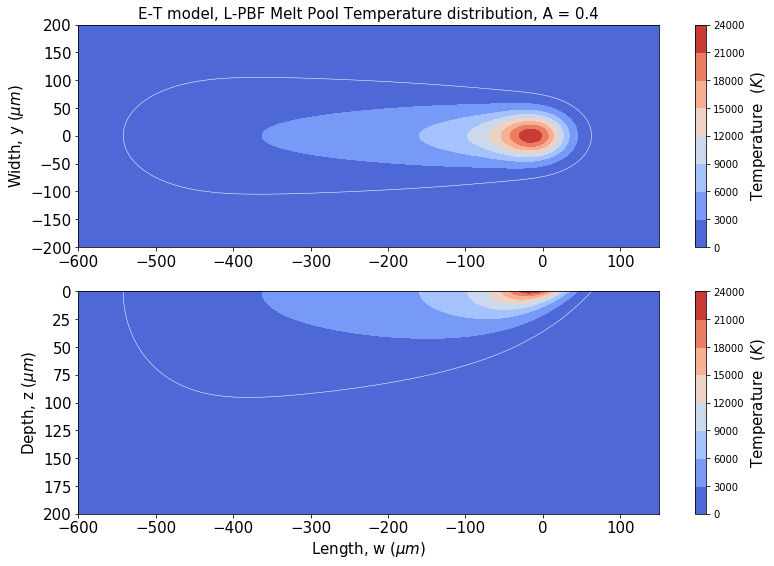

In [48]:
def contour_YX ( xi, psi, zi, u, taulim ):
    conterror = numpy.zeros (shape=(len(psi),len(xi))) ; res = numpy.zeros(shape=(len(psi),len(xi)))
    for i, yvalue in enumerate (psi) :
        for j, xvalue in enumerate (xi) :
            res [ i, j ] , conterror [ i , j ] = quad ( integrand, 0, taulim, args = ( xvalue, yvalue, zi, u ), epsabs=1e-10, epsrel=1e-10)
    Tcont = res / ( numpy.sqrt ( 2 *numpy.pi ) )
    return Tcont, conterror

def contour_XZ(xi,psi,zi,u,taulim):
    conterror = numpy.zeros( shape = ( len(zi), len(xi) ) ) ; res = numpy.zeros(shape = ( len(zi), len(xi) ) )
    for i, zvalue in enumerate ( zi ) :
        for j, xvalue in enumerate (xi):
            res [ i, j ], conterror [ i, j ] = quad ( integrand, 0, taulim, args = (xvalue, psi, zvalue, u ), epsabs=1e-12, epsrel=1e-12 )
    Tcont = res / (numpy.sqrt ( 2 * numpy.pi ) )
    return Tcont, conterror

def contour_YZ(xi,psi,zi,u,taulim):
    conterror = numpy.zeros( shape = ( len(zi), len(psi) ) ) ; res = numpy.zeros(shape = ( len(zi), len(psi) ) )
    for i, zvalue in enumerate ( zi ) :
        for j, yvalue in enumerate (psi):
            res [ i, j ], conterror [ i, j ] = quad ( integrand, 0, taulim, args = (xi, yvalue, zvalue, u ), epsabs=1e-12, epsrel=1e-12 )
    Tcont = res / (numpy.sqrt ( 2 * numpy.pi ) )
    return Tcont, conterror

Tcontour_YX, Error_YX = contour_YX ( xi_YX, psi_YX, zi_YX, u_par, tau )
Tcontour_YX = ( Tcontour_YX * Absor * n_par ) + Tambient  # Multiply by operating parameter and add ambient temperature

Tcontour_XZ, Error_XZ = contour_XZ (xi_XZ, psi_XZ, zi_XZ, u_par, tau)
Tcontour_XZ = ( Tcontour_XZ  * Absor * n_par ) + Tambient

#Tcontour_YZ, Error_YZ = contour_YZ (xi_YZ, psi_YZ, zi_YZ, u_par, tau)
#Tcontour_YZ = ( Tcontour_YZ * Absor * n_par ) + Tambient

ET_contour_graphs = pyplot.figure ( figsize = ( 13 , 9 ) ) ; font = 15
pyplot.subplot(211) 
pyplot.tick_params (labeltop = False, labelright = False, labelleft = True )
xgrid_YX, ygrid_YX = numpy.meshgrid ( w_YX, y_YX )
xgrid_YX = xgrid_YX * (10**6) ; ygrid_YX = ygrid_YX * (10**6) ; 
contours_YX = pyplot.contourf ( xgrid_YX, ygrid_YX, Tcontour_YX, cmap = cm.coolwarm )
cbar_YX = pyplot.colorbar ( contours_YX )
contlines_YX = pyplot.contour(xgrid_YX, ygrid_YX, Tcontour_YX ,[ Tmelt ], colors = ( 'white' ), linewidths=(0.5), linestyles= '-')
#pyplot.clabel(contlines_YX,fmt='%2.1f', colors='black', fontsize=font)

pyplot.title ('E-T model, L-PBF Melt Pool Temperature distribution, A = '+ str(Absor) , fontsize = font)
pyplot.ylabel('Width, y $(μm)$',fontsize=font) ; #pyplot.xlabel('Length $(μm)$',fontsize=font)
cbar_YX.set_label('Temperature  $ (K) $' ,fontsize=font)
pyplot.yticks(fontsize=font, rotation=0) ; pyplot.xticks(fontsize=font, rotation=0);
#pyplot.ticklabel_format (axis = 'both', style = 'sci', scilimits = ( 0, 0 ) )
#pyplot.subplots_adjust (hspace = 0.05)
#pyplot.axhline(y=0, color='black', linestyle='--')  ; pyplot.axvline(x=0,color='black', linestyle='--');

pyplot.subplot(212)
pyplot.tick_params(labeltop=False, labelright=False,labelleft=True)
pyplot.gca().invert_yaxis()
xgrid_XZ, ygrid_XZ = numpy.meshgrid ( w_XZ, z_XZ )
xgrid_XZ = xgrid_XZ * (10**6) ; ygrid_XZ = ygrid_XZ * (10**6) ; 
contours_XZ = pyplot.contourf ( xgrid_XZ, ygrid_XZ, Tcontour_XZ, cmap = cm.coolwarm )
cbar_XZ = pyplot.colorbar(contours_XZ)
contlines_XZ = pyplot.contour(xgrid_XZ, ygrid_XZ, Tcontour_XZ, [ Tmelt ],colors=('white'),linewidths=(0.5),linestyles= '-')
#pyplot.clabel(contlines_XZ,fmt='%2.1f', colors='black', fontsize=font)
cbar_XZ.set_label('Temperature  $ ( K )  $' ,fontsize=font)
pyplot.ylabel('Depth, z $ (μm)$',fontsize=font) ; pyplot.xlabel('Length, w $(μm)$',fontsize=font)
pyplot.yticks(fontsize=font, rotation=0) ; pyplot.xticks(fontsize=font, rotation=0);
#pyplot.ticklabel_format (axis = 'both', style = 'sci', scilimits = ( 0, 0 ) )
#pyplot.axvline(x=0,color='black', linestyle='--')

In [10]:
numpy.max(Tcontour_YX), numpy.max(Error_YX), numpy.max(Tcontour_XZ), numpy.max(Error_XZ)

(28662.086748364,
 9.999636614078412e-11,
 28681.483792733758,
 9.999819589883504e-13)

In [ ]:
w_depth = 0 ; y_depth = 0  #At the beam center    ; w = x - (v*t) Where the point of interest is wrt beam center
z_depth = numpy.linspace (0, 100e-06 , 1000) # In meters

w_width = 0 #At the center 
z_width = 0 #At the surface
y_width = numpy.linspace (0, 100e-06, 1000) # In meters

xi_depth_LB = ( speed * w_depth ) / ( 2 * apow )
psi_depth_LB = ( speed * y_depth ) / ( 2 * apow )
zi_depth_LB = ( speed * z_depth ) / ( 2 * apow )

xi_width_LB = ( speed * w_width ) / ( 2 * apow )
psi_width_LB = ( speed * y_width ) / ( 2 * apow )
zi_width_LB = ( speed * z_width ) / ( 2 * apow )

u_LB = ( speed * radius ) / ( 2 * apow ) # Distribution parameter
n_LB = ( Absor * power * speed ) / ( 4 * numpy.pi * rho_bed * C_solid * ( apow ** 2 ) ) # Operating parameter

tau_LB = ((speed**2)*t)/(2*apow)

# Results of θ / n for my simulations
Distr_width_LB, Error_width_LB = thetan_width(xi_width_LB,psi_width_LB,zi_width_LB,u_LB,tau_LB)
Distr_depth_LB, Error_depth_LB = thetan_depth(xi_depth_LB,psi_depth_LB,zi_depth_LB,u_LB,tau_LB)

# Express results to their units
T_width_LB = ( Distr_width_LB * n_LB ) + Tambient
T_depth_LB = ( Distr_depth_LB * n_LB ) + Tambient
pyplot. figure (figsize = (12,5)) ; font = 20
z_depth = z_depth * (10**6) ; y_width = y_width * (10**6)
pyplot.plot (z_depth, T_depth_LB, label = ' T(z)@'+ ' ' + ' w,y= 0')
pyplot.plot (y_width, T_width_LB, label = ' T(y)@'+ ' ' + ' w,z= 0')
pyplot.axhline(y=Tmelt, color='black', linestyle='--',label = 'Melting T')  
title = 'A=' + str(A) + ', P=' + str(power) + ' W,  v='+ str (speed)+ ' m/s, ' + 't='+ str (t) +' s, ' + 'u=' + str (
    round(u_LB, 2))
pyplot.title (title, fontsize = font); pyplot.legend(loc = 'best', fontsize = font); 
pyplot.ylabel ('$Temperature \ (K)$', fontsize = font); pyplot.xlabel ('$ Depth \ (z), \ Width \ (y) \ (um)$', fontsize = font);
pyplot.yticks(fontsize=font, rotation=0) ; pyplot.xticks(fontsize=font, rotation=0)
pyplot.xlim(0);
#pyplot.ticklabel_format(axis='x', style='sci', scilimits=(-2,0))
print ('Maximum quad errors',numpy.max(Error_depth_LB), numpy.max(Error_width_LB) )